In [159]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from rembg import remove

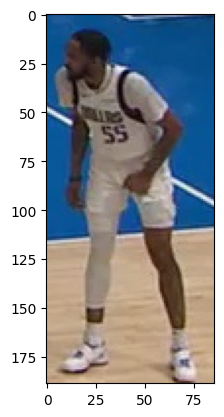

In [160]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# take jersey of image

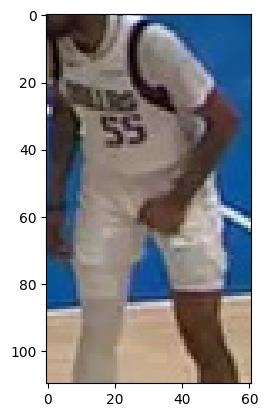

In [199]:
jersey = image[int(image.shape[0]/7):int(8*image.shape[0]/11), int(image.shape[1]/7):int(6*image.shape[1]/7)]
plt.imshow(jersey)
plt.show()

# Use K means to cluster image into 2 clusters

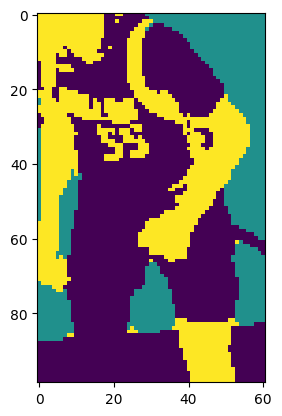

In [193]:
image_2d = jersey.reshape((-1, 3))

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(jersey.shape[0], jersey.shape[1])

plt.imshow(clustered_image)
plt.show()

In [179]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

2


In [180]:
unique_labels, counts = np.unique(labels, return_counts=True)
most_prevalent_index = np.argmax(counts)
most_prevalent_label = unique_labels[most_prevalent_index]
print("Most prevalent cluster label:", most_prevalent_label)

Most prevalent cluster label: 1


In [12]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[non_player_cluster]

array([ 28.55637957,  71.3011967 , 113.45187932])